Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

1.	Загрузите датасет breast_cancer.

In [3]:
breast_cancer = load_breast_cancer()
data = breast_cancer.data
target = breast_cancer.target

2.	Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.

In [5]:
data_2d = data[:, :2]
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

3.	Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_2d, target, test_size=0.2, random_state=0)

4.	Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.

In [9]:
clf = SVC(C=0.01, kernel="rbf")
clf.fit(X_train, y_train)

print(f"Точность (train): {clf.score(X_train, y_train)}")
print(f"Точность (test): {clf.score(X_test, y_test)}")

Точность (train): 0.6923076923076923
Точность (test): 0.6666666666666666


#Вывод:
Модель обучена средне, так как точноть не сильно больше 0,5; однако предсказания сделанные на основе выборки будут точнее, чем рандомно подобранные значения

5.	Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):

a.	собрать больше объектов наблюдения;

b.	провести обучение на меньшем объеме данных;

c.	исключить часть признаков из модели;

d.	добавить новые признаки в модель;

e.	добавить полиномиальные признаки;

f.	попробовать более сложные модели;

g.	попробовать более простые модели;

h.	увеличить регуляризацию модели;

i.	уменьшить регуляризацию модели;


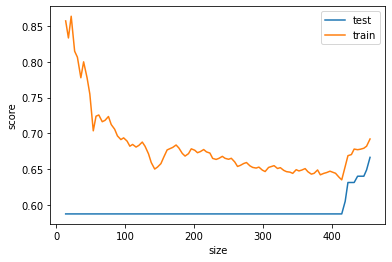

In [10]:
data = np.linspace(len(X_train) // 100 + 10, len(X_train), 100, dtype=int)
test_scores = []
train_scores = []

for i in data:
    clf = SVC(C=0.01, kernel='rbf')

    x_ = X_train[:i]
    y_ = y_train[:i]

    clf.fit(x_, y_)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(x_, y_))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('size')
ax.set_ylabel('score')
_ = ax.legend()

#Вывод:
Из-за небольшой точности и слабой зависимости точности от размера выборке, можно сделать вывод о том, что модель не доучена.
Видно, что в начале с увеличением размера выборки начинает падать ее точность, но, как только размер выборки стал больше 400, точность обеих выборок начала увеличиваться. Чтобы продолжить эту тенденцию, нужно a. собрать больше объектов наблюдения; Чтобы увеличить точность, необходимо выявить наиболее важные признаки и возвести их в степень (e. добавить полиномиальные признаки;). То есть, h. увеличить регуляризацию модели;

#Увеличение регуляризации

In [11]:
clf = SVC(kernel='rbf', C=100)
clf.fit(X_train, y_train)
print(f"Score (test): {clf.score(X_test, y_test)}")
print(f"Score (train): {clf.score(X_train, y_train)}")

Score (test): 0.868421052631579
Score (train): 0.9142857142857143


#Использование классификатора k-ближайших соседей


In [12]:
import sklearn.neighbors as neigh

kn = neigh.KNeighborsClassifier(n_neighbors=90, n_jobs=6).fit(X_train,y_train)
print(f"Score (test): {kn.score(X_test, y_test)}")
print(f"Score (train): {kn.score(X_train, y_train)}")

Score (test): 0.8947368421052632
Score (train): 0.8879120879120879


#Использование логистической регрессии

In [14]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=5000, n_jobs=6).fit(X_train, y_train)
print(f"Score (test): {logr.score(X_test, y_test)}")
print(f"Score (train): {logr.score(X_train, y_train)}")

Score (test): 0.8947368421052632
Score (train): 0.8989010989010989


7. Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

  0%|          | 0/50 [00:00<?, ?it/s]

0.8771929824561403

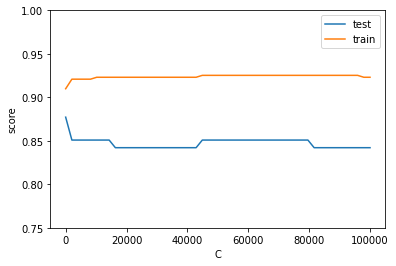

In [15]:
from tqdm.notebook import tqdm
data = np.linspace(1, 100000, 50)

test_scores = []
train_scores = []

for i in tqdm(data):
    clf = SVC(C=i, kernel="rbf")

    clf.fit(X_train, y_train)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(X_train, y_train))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('С')
ax.set_ylabel('score')
ax.set_ylim([0.75, 1])
ax.legend()

max(test_scores)

8.Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.

  0%|          | 0/500 [00:00<?, ?it/s]

0.8771929824561403

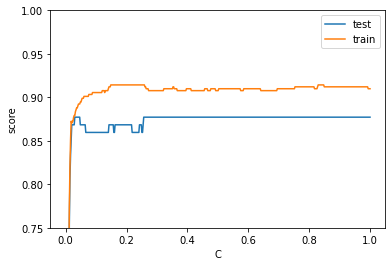

In [20]:
data = np.linspace(0.0001, 1, 500)

test_scores = []
train_scores = []

for i in tqdm(data):
    clf = SVC(C=i, kernel="rbf")

    clf.fit(X_train, y_train)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(X_train, y_train))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('С')
ax.set_ylabel('score')
ax.set_ylim([0.75, 1])
ax.legend()

max(test_scores)

С большим значением C модель переобучается
C малым - недообучается.


С увеличением аргумента C точность модели на тренируемых данных увеличивается, а на тестовых - уменьшается.

9. Найдите методом подбора оптимальное значение параметра регуляризации (примерное).

In [21]:
clf = SVC(kernel='rbf', C=51.1)
clf.fit(X_train, y_train)
print(f'test accuracy: {clf.score(X_test, y_test)}')
print(f'train accuracy: {clf.score(X_train, y_train)}')

test accuracy: 0.8771929824561403
train accuracy: 0.9164835164835164


In [22]:
results = []
for i in range(1,1000):
    value = i * 0.1
    clf = SVC(kernel='rbf', C=value)
    clf.fit(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    train_acc = clf.score(X_train, y_train)
    results.append((value, test_acc, train_acc))
    
results.sort(key=lambda x: x[1])
print(results[-1])

(51.1, 0.8771929824561403, 0.9164835164835164)


При C = 51.1 получаем 87.7% на тестовой выборке и 91.6% на тренировочной, что очень хорошо.

10. Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.

График зависимости тестовой и обучающей точности от значения регуляризационного параметра.

  0%|          | 0/50 [00:00<?, ?it/s]

0.9035087719298246

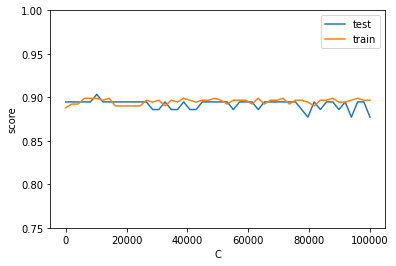

In [23]:
data = np.linspace(1, 100000, 50)

test_scores = []
train_scores = []

for i in tqdm(data):
    clf = SVC(C=i, kernel="linear")

    clf.fit(X_train, y_train)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(X_train, y_train))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('С')
ax.set_ylabel('score')
ax.set_ylim([0.75, 1])
ax.legend()

max(test_scores)

Найти методом подбора оптимальное значение параметра регуляризации

In [24]:
clf = SVC(kernel='linear', C=9.9)
clf.fit(X_train, y_train)
print(f'test accuracy: {clf.score(X_test, y_test)}')
print(f'train accuracy: {clf.score(X_train, y_train)}')

test accuracy: 0.8947368421052632
train accuracy: 0.8879120879120879


In [25]:
results = []
for i in range(1,100):
    value = i * 0.1
    clf = SVC(kernel='linear', C=value)
    clf.fit(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    train_acc = clf.score(X_train, y_train)
    results.append((value, test_acc, train_acc))
    
results.sort(key=lambda x: x[2])
print(results[-1])

(9.9, 0.8947368421052632, 0.8879120879120879)


#Вывод
Модели примерно одинаковые, так как при одинаковых значениях регуляции и объема выборки, их значения точности почти не отличаются. Следовательно, для обучения можно использовать обе модели